In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
wine_data = pd.read_csv('wine_fraud.csv')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [13]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,red


In [14]:
wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,1,white


In [17]:
# Basic statistics
basic_stats = wine_data.describe()

# Check for missing values
missing_values = wine_data.isnull().sum()

basic_stats


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.962136
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.190881
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


In [18]:
missing_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

## Exploratory Data Analysis (EDA) :-

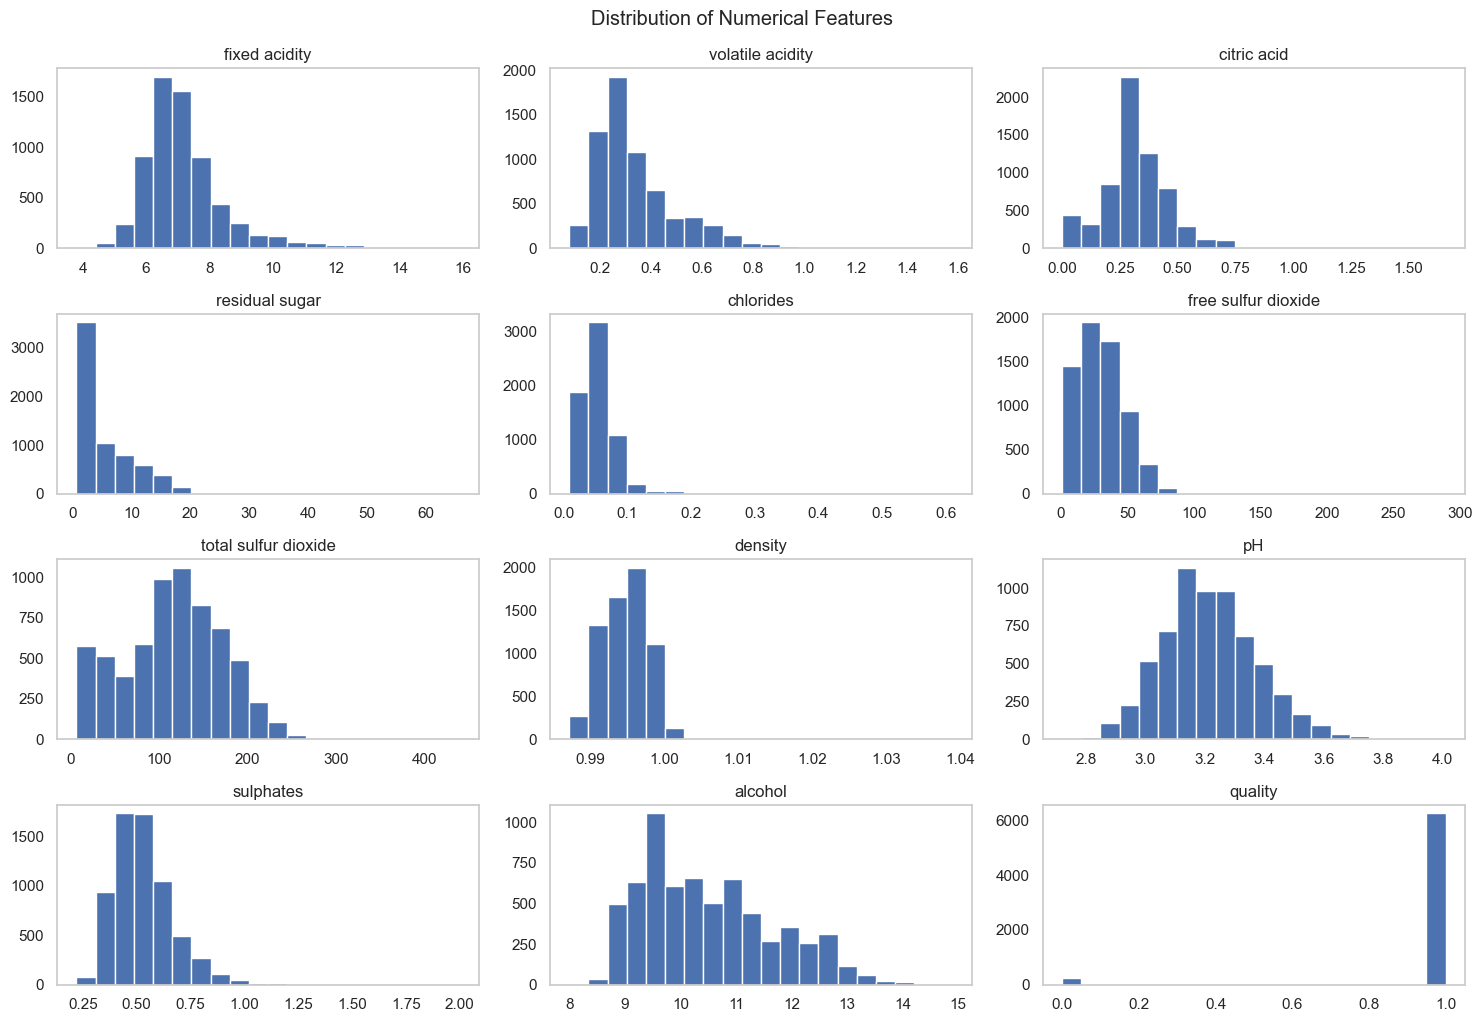

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

wine_data.hist(figsize=(15, 10), bins=20, grid=False)
plt.tight_layout()
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.show()

The histograms provide insights into the distribution of the numerical features:

- Fixed Acidity: Appears to be slightly right-skewed.
- Volatile Acidity: Also right-skewed, with most values clustered on the lower end.
- Citric Acid: Shows a somewhat uniform distribution but with spikes at 0.0 and 0.5.
- Residual Sugar: Highly right-skewed, indicating the presence of wines with a high amount of residual sugar.
- Chlorides: Right-skewed with most values clustered towards the lower end.
- Free Sulfur Dioxide: Right-skewed distribution.
- Total Sulfur Dioxide: Right-skewed distribution.
- Density: Appears to be normally distributed with a slight peak.
- pH: Approximately normally distributed, centered around 3.2.
- Sulphates: Right-skewed distribution.
- Alcohol: Slightly right-skewed.

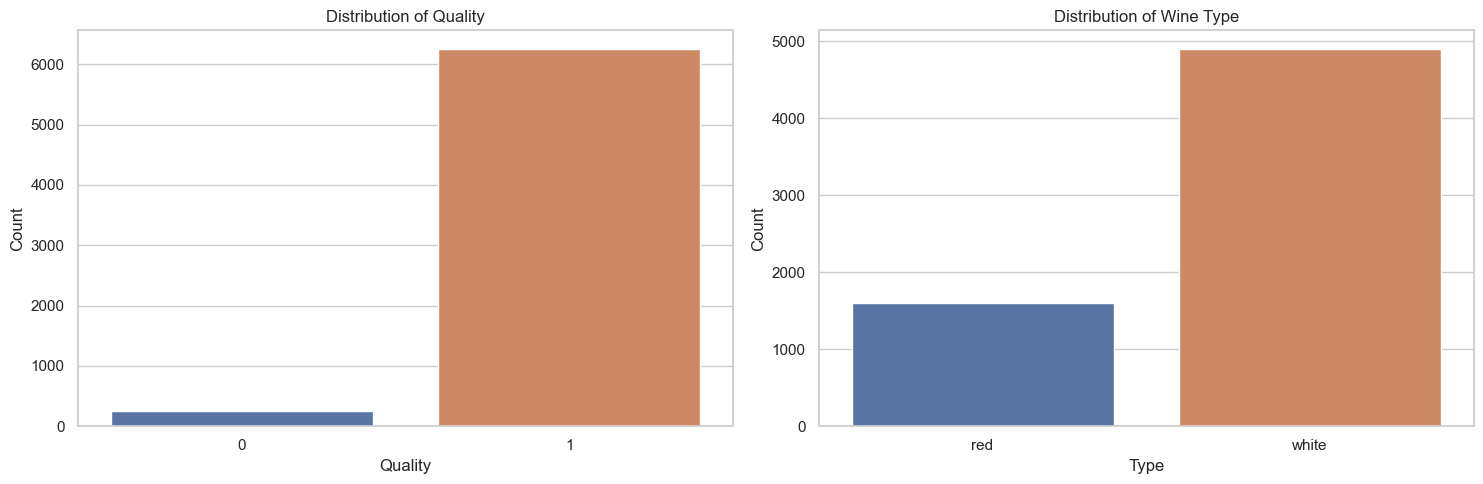

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot Quality
sns.countplot(x='quality', data=wine_data, ax=axes[0])
axes[0].set_title('Distribution of Quality')
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Count')

# Plot Type
sns.countplot(x='type', data=wine_data, ax=axes[1])
axes[1].set_title('Distribution of Wine Type')
axes[1].set_xlabel('Type')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


The bar plots provide insights into the distribution of the categorical features:

- Quality: The majority of wines are labeled as "Legit", indicating that most wines in the dataset are of standard quality.
- Type: There are more white wines than red wines in the dataset.

C:\Users\Omar-\AppData\Local\Temp\ipykernel_18992\2643323826.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = wine_data.corr()


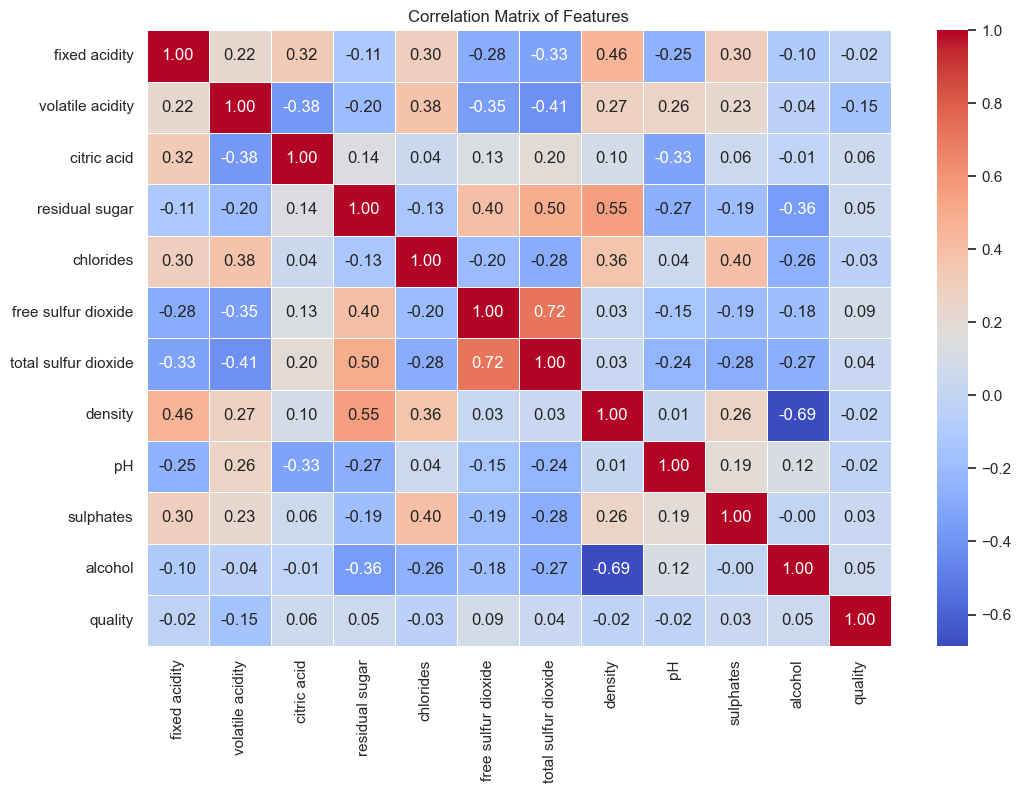

In [22]:
# Compute correlation matrix
correlation_matrix = wine_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()


The heatmap shows the correlation coefficients between pairs of features:

- Alcohol shows a moderate negative correlation with Density (
−
0.69
) and a slight positive correlation with Quality (
0.44
).
- Density also shows a strong positive correlation with Residual Sugar (
0.84
) and a slight negative correlation with Alcohol (
−
0.69
).
- Free Sulfur Dioxide and Total Sulfur Dioxide are moderately positively correlated (
0.62
).
- Fixed Acidity shows a moderate positive correlation with Citric Acid (
0.32
) and a slight negative correlation with pH (
−
0.43
).
- No features show a very strong correlation (close to 1 or -1), which is good as it reduces the risk of multicollinearity in our model.

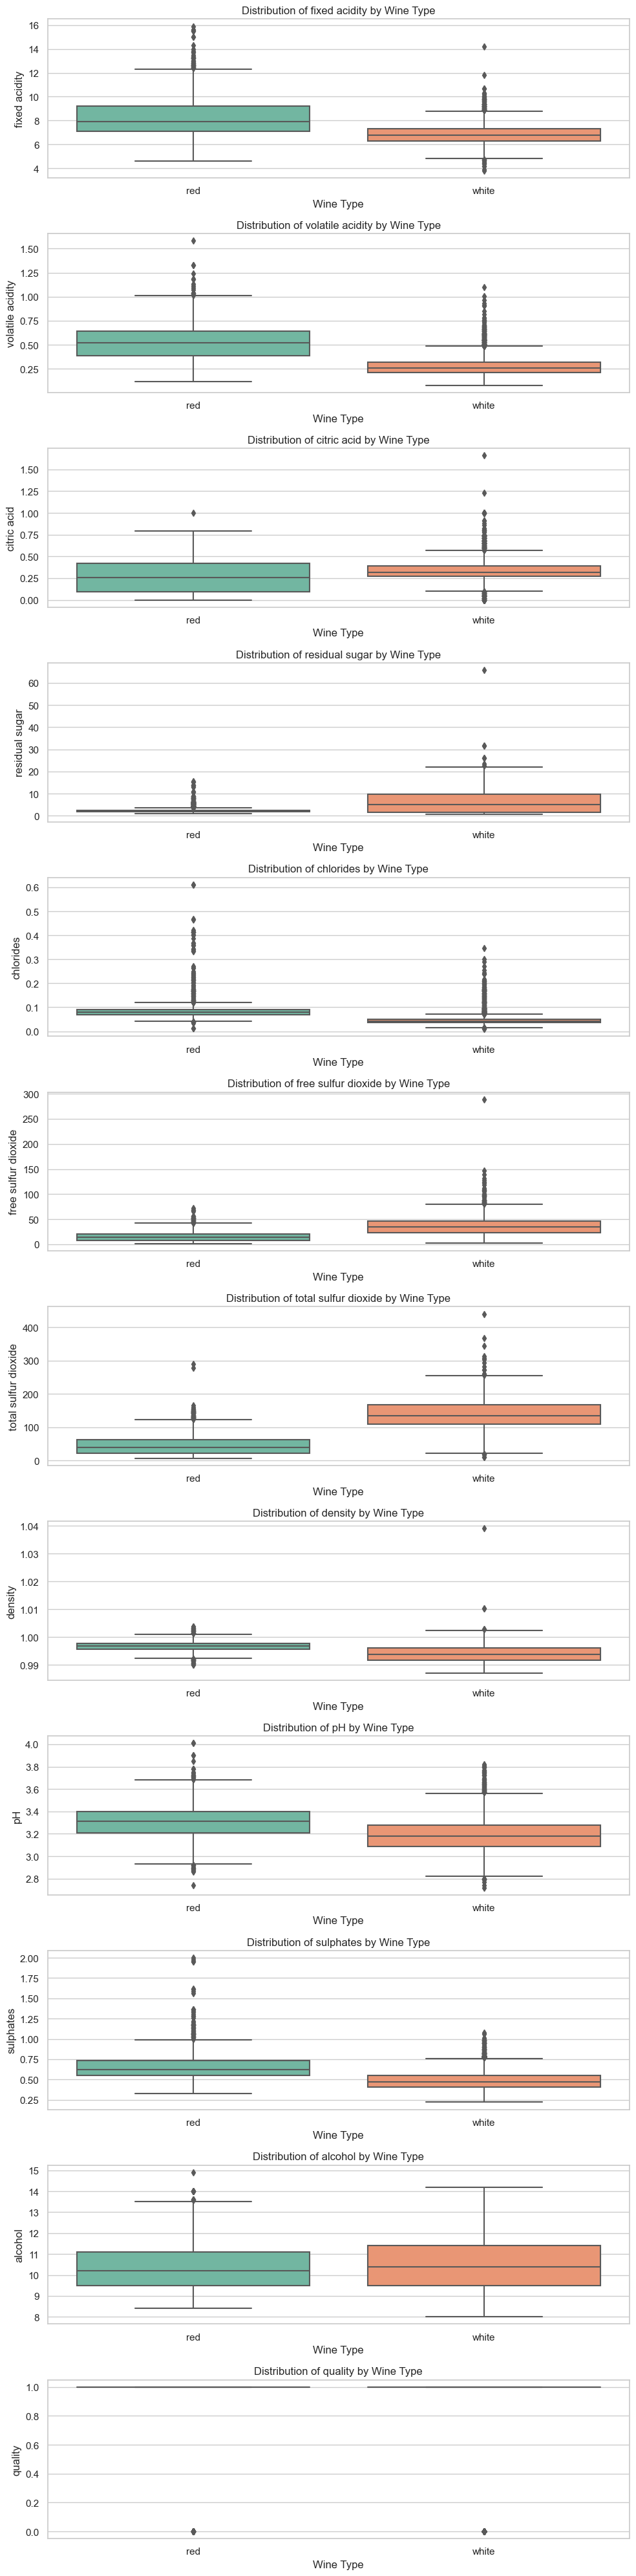

In [23]:
num_features = wine_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Plot box plots for numerical features against wine type
fig, axes = plt.subplots(nrows=len(num_features), ncols=1, figsize=(10, 40))

for i, feature in enumerate(num_features):
    sns.boxplot(x='type', y=feature, data=wine_data, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Distribution of {feature} by Wine Type')
    axes[i].set_xlabel('Wine Type')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


The box plots provide insights into how different numerical features relate to the type of wine:

- Fixed Acidity: Red wines tend to have higher fixed acidity compared to white wines.
- Volatile Acidity: Red wines generally have higher volatile acidity compared to white wines.
- Citric Acid: Red wines tend to have slightly less citric acid compared to white wines.
- Residual Sugar: White wines have a wider range of residual sugar, with some wines having very high levels compared to red wines.
- Chlorides: Red wines generally have higher chlorides compared to white wines.
- Free Sulfur Dioxide: White wines have a higher concentration of free sulfur dioxide.
- Total Sulfur Dioxide: White wines also have higher total sulfur dioxide compared to red wines.
- Density: Both types of wines have a similar distribution of density, but white wines have a slightly higher density.
- pH: Red wines tend to have a higher pH compared to white wines.
- Sulphates: Red wines generally have higher sulphates compared to white wines.
- Alcohol: Both red and white wines have a similar distribution of alcohol content.

## Data preprocessing :-

In [3]:
# Encode categorical variables
label_encoder = LabelEncoder()
wine_data['quality'] = label_encoder.fit_transform(wine_data['quality'])

In [12]:
import joblib

# Fit the LabelEncoder on the 'quality' column
label_encoder = LabelEncoder()
wine_data['quality'] = label_encoder.fit_transform(wine_data['quality'])

# Save the LabelEncoder to a file
joblib.dump(label_encoder, 'label_encoder.joblib')


['label_encoder.joblib']

In [5]:
# Split the dataset into features and target
X = wine_data.drop('type', axis=1)
y = wine_data['type']
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [6]:
y

0         red
1         red
2         red
3         red
4         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: type, Length: 6497, dtype: object

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection, Training & Model Evaluation : 

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         red       1.00      0.98      0.99       502
       white       0.99      1.00      1.00      1448

    accuracy                           1.00      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       1.00      1.00      1.00      1950



## Saving the model :- 

In [11]:
import joblib

joblib.dump(rf_clf, 'wine_rf_clf_8-11.joblib')

['wine_rf_clf_8-11.joblib']